# MODS202 - Econometrics Project

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Setup:

In [98]:
# price     crime     nox       rooms     dist      radial
# proptax   stratio   lowstat   lprice    lnox      lproptax

df = pd.read_csv("./data/hprice2.raw", delim_whitespace=True, header=None)

print(df)

price = df[0]
crime = df[1]
nox = df[2]
rooms = df[3]
proptax = df[6]
lprice = df[9]
lnox = df[10]
lproptax = df[11]

const = np.ones(len(price))

        0      1     2     3     4   5     6     7     8          9   \
0    24000  0.006  5.38  6.57  4.09   1  29.6  15.3  4.98  10.085810   
1    21599  0.027  4.69  6.42  4.97   2  24.2  17.8  9.14   9.980402   
2    34700  0.027  4.69  7.18  4.97   2  24.2  17.8  4.03  10.454500   
3    33400  0.032  4.58  7.00  6.06   3  22.2  18.7  2.94  10.416310   
4    36199  0.069  4.58  7.15  6.06   3  22.2  18.7  5.33  10.496790   
..     ...    ...   ...   ...   ...  ..   ...   ...   ...        ...   
501  22400  0.063  5.73  6.59  2.48   1  27.3  21.0  9.67  10.016820   
502  20600  0.045  5.73  6.12  2.29   1  27.3  21.0  9.08   9.933046   
503  23899  0.061  5.73  6.98  2.17   1  27.3  21.0  5.64  10.081590   
504  22000  0.110  5.73  6.79  2.39   1  27.3  21.0  6.48   9.998797   
505  11900  0.047  5.73  6.03  2.51   1  27.3  21.0  7.88   9.384294   

           10        11  
0    1.682688  5.690360  
1    1.545433  5.488938  
2    1.545433  5.488938  
3    1.521699  5.402678  
4    

## Part 2: HETEROSKEDASTICITY

**<font color="#0078D4">
    Question 20: Explain the problem of heteroskedasticity with an example of the course.
</font>**

Following the definition of heteroskedasticity, we can say that it is a problem that occurs when the variance of the error term is not constant. In other words, the variance of the error term is not the same for all observations. This is a problem because it violates the assumption of homoskedasticity, which is one of the assumptions of the classical linear regression model.
In particular we can't say anymore that the OLS estimator is BLUE (Best Linear Unbiased Estimator).

ESEMPI ????

**<font color="#0078D4">
    Question 21: Suppose that $E[uu]' = \sigma^2 \Omega$. Show that the GLS estimator is the best linear unbiased estimator
</font>**

If we have:
$$E[uu^{'}] = \sigma^2 \Omega$$

**<font color="#0078D4">
    Question 22:  In the specification of question 10, test the hypothesis of no heteroskedasticity of linear form, i.e. in the regression of $u^2$ on constant, crime, nox, rooms, proptax, test $H_0: \delta_{crime}, \delta_{nox}, \delta_{room}, \delta_{proptax}=0$, where the coefficients $\delta_k$ (k=crime, nox, rooms, proptax) are associated with the corresponding explanatory variables.
</font>**

In [99]:
from scipy.stats import f
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

y = price
X = np.column_stack((const, crime, nox, rooms, proptax))

model_0 = sm.OLS(y, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        19:30:42   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

**<font color="#0078D4">
    Question 23: In the specification of question 11, test the hypothesis of no heteroskedasticity of linear form.
</font>**

In [100]:
y = lprice
X = np.column_stack((const, crime, nox, rooms, proptax))

model_0 = sm.OLS(y, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     17.98
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           8.33e-14
Time:                        19:30:42   Log-Likelihood:                 185.10
No. Observations:                 506   AIC:                            -360.2
Df Residuals:                     501   BIC:                            -339.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0757      0.090      0.842      0.4

**<font color="#0078D4">
    Question 24: In the specification of question 12, test the hypothesis of no heteroskedasticity of linear form.
</font>**

In [101]:
y = lprice
X = np.column_stack((const, crime, lnox, rooms, lproptax))

model_0 = sm.OLS(y, X).fit()
u = model_0.resid
u2 = u**2

y = u2
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())  # reject H0 p-value < 0.05

R2_1 = model_1.rsquared
n, k = X.shape
F = (R2_1 / k) / ((1 - R2_1) / (n - k - 1))
p_value = f.sf(F, k, n - k - 1)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_breuschpagan(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

_, _, F, p_value = het_white(model_1.resid, model_1.model.exog)

print("F-statistic: ", F)
print("p-value: ", p_value)
print("---------")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     16.51
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.02e-12
Time:                        19:30:42   Log-Likelihood:                 184.66
No. Observations:                 506   AIC:                            -359.3
Df Residuals:                     501   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5496      0.167     -3.289      0.0

**<font color="#0078D4">
   Question 25: Comment on the differences between your results of questions 22, 23, 24.
</font>**

**<font color="#0078D4">
    Question 26: Regardless of the results of the test of question 22, identify the most significant variable causing heteroskedasticity using the student statistics and run a WLS regression with the identified variable as weight.
</font>**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     6.799
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           2.47e-05
Time:                        19:30:42   Log-Likelihood:                -10130.
No. Observations:                 506   AIC:                         2.027e+04
Df Residuals:                     501   BIC:                         2.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.885e+07   6.41e+07     -0.917      0.3

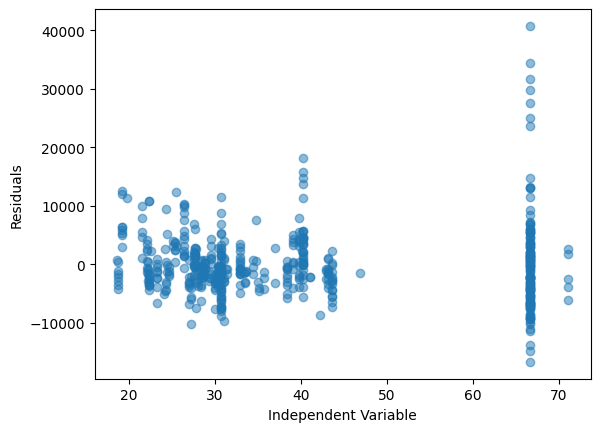

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.628
Model:                            WLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     211.2
Date:                Sat, 09 Dec 2023   Prob (F-statistic):          4.82e-106
Time:                        19:30:43   Log-Likelihood:                -5087.7
No. Observations:                 506   AIC:                         1.019e+04
Df Residuals:                     501   BIC:                         1.021e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.483e+04   3013.539     -8.241      0.0

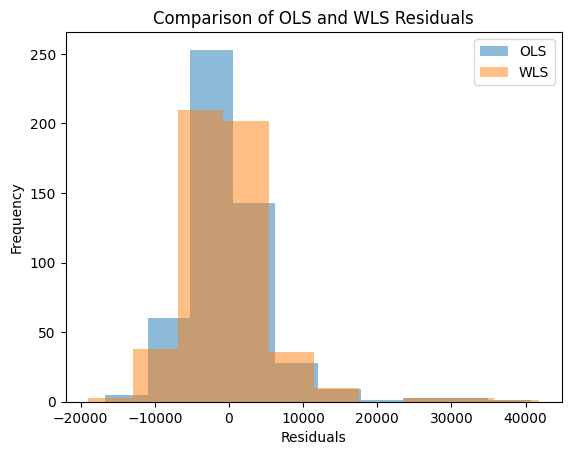

In [102]:
y_0 = price
X = np.column_stack((const, crime, nox, rooms, proptax))

significant_var = proptax

model_0 = sm.OLS(y_0, X).fit()
u = model_0.resid
u2 = u**2

residuals_ols = model_0.resid

y = u2
model_ols = sm.OLS(y, X).fit()
print(model_ols.summary())

# Scatter plot of residuals against predicted values

plt.scatter(significant_var, residuals_ols, alpha=0.5)
plt.xlabel("Independent Variable")
plt.ylabel("Residuals")
plt.show()

h = np.sqrt(significant_var)
model_wls = sm.WLS(y_0, X, weights=1 / h).fit()
print(model_wls.summary())

residuals_wls = model_wls.resid

# histogram of residuals for both OLS and WLS models
plt.hist(residuals_ols, alpha=0.5, label="OLS")
plt.hist(residuals_wls, alpha=0.5, label="WLS")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Comparison of OLS and WLS Residuals")
plt.legend()
plt.show()

In [103]:
# Calculate t_stats and p_values manually and compare with statsmodels
from scipy.stats import t

y = price
X = np.column_stack((const, crime, nox, rooms, proptax))

model_ols = sm.OLS(y, X).fit()

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

u = y - X @ beta_hat
n, k = np.shape(X)
sig2 = u.T @ u / (n - k)
Var = sig2 * np.linalg.inv(X.T @ X)
se = np.sqrt(np.diag(Var))
t_stats = beta_hat / se
distrib_df = X.shape[0] - X.shape[1]
p_values = 2 * (1 - t.cdf(np.abs(t_stats), distrib_df))

print(t_stats)
print(model_ols.tvalues)
print(p_values)
print(model_ols.pvalues)

[-5.81059887 -3.54396301 -2.09916169 19.28531385 -3.73094955]
const    -5.810599
x1       -3.543963
x2       -2.099162
x3       19.285314
x4       -3.730950
dtype: float64
[1.10815244e-08 4.31066923e-04 3.63024347e-02 0.00000000e+00
 2.12584339e-04]
const    1.108152e-08
x1       4.310669e-04
x2       3.630243e-02
x3       2.141645e-62
x4       2.125843e-04
dtype: float64


In [104]:
# Calculate t_stats and p_values manually and compare with statsmodels with robust standard errors
from scipy.stats import t

y = price
X = np.column_stack((const, crime, nox, rooms, proptax))

model_ols = sm.OLS(y, X).fit()
print(model_ols.summary())

se = model_ols.HC1_se
estimate = model_ols.params
t_stats = (estimate - 0) / se

distrib_df = X.shape[0] - X.shape[1]
p_values = 2 * (1 - t.cdf(np.abs(t_stats), distrib_df))

print(pd.DataFrame({"t-statistic": t_stats, "p-value": p_values}))
print(pd.DataFrame({"t-statistic (OLS)": model_ols.tvalues, "p-value (OLS)": model_ols.pvalues}))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     169.6
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.06e-91
Time:                        19:30:43   Log-Likelihood:                -5119.6
No. Observations:                 506   AIC:                         1.025e+04
Df Residuals:                     501   BIC:                         1.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.868e+04   3215.205     -5.811      0.0